In [1]:
import seaborn as sns, pandas as pd, numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
data = pd.read_csv("data/classdata-fixed.csv")

In [3]:
data = data.drop( 'Unnamed: 0', axis='columns')

In [4]:
data

,Ia,Ib,Ic,Va,Vb,Vc,fault
0,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001
...,...,...,...,...,...,...,...
7856,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598,0
7857,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407,0
7858,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104,0
7859,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690,0


In [5]:
fault1001 = data[data["fault"]==1001]
fault1011 = data[data["fault"]==1011]
fault0110 = data[data["fault"]==110]
fault0111 = data[data["fault"]==111]
fault1111 = data[data["fault"]==1111]
fault0 = data[data["fault"]==0]

In [6]:
fault0.head

<bound method NDFrame.head of              Ia         Ib         Ic        Va        Vb        Vc  fault
5496  61.806321 -22.861987  21.102428  0.366320 -0.567179  0.200859      0
5497  48.041678 -23.401108  21.273066  0.367341 -0.564257  0.196916      0
5498  34.256533 -23.909263  21.408047  0.368258 -0.561168  0.192910      0
5499  20.464350 -24.396165  21.501503  0.369086 -0.557916  0.188830      0
5500   7.109677 -25.075888  21.341967  0.370321 -0.554505  0.184184      0
...         ...        ...        ...       ...       ...       ...    ...
7856 -66.237921  38.457041  24.912239  0.094421 -0.552019  0.457598      0
7857 -65.849493  37.465454  25.515675  0.103778 -0.555186  0.451407      0
7858 -65.446698  36.472055  26.106554  0.113107 -0.558211  0.445104      0
7859 -65.029633  35.477088  26.684731  0.122404 -0.561094  0.438690      0
7860 -64.598401  34.480799  27.250065  0.131669 -0.563835  0.432166      0

[2365 rows x 7 columns]>

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

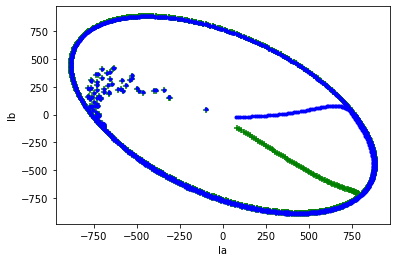

In [31]:
plt.xlabel('Ia')
plt.ylabel('Ib')
plt.scatter(fault0111['Ia'], fault0111['Ib'],color="green",marker='+')
plt.scatter(fault1111['Ia'], fault1111['Ib'],color="blue",marker='.')

In [9]:
# 5 neighbors seems to be the best at still 100%
# 6 negibhbors shows 0.9996% accuracy
# 11 neighbors shows also 0.9996%

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
feature_cols = data.columns[:-1]
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
                                         test_size=0.3,
                                         random_state=13)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.fault))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'fault']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'fault']

In [12]:
X_train

,Ia,Ib,Ic,Va,Vb,Vc
6161,-37.709198,98.788101,-64.455039,-0.600534,0.181597,0.418938
342,-74.687919,-51.895067,49.567882,0.381840,-0.548580,0.166740
1364,872.348217,-477.672401,11.827999,0.018749,-0.287594,0.268845
5133,-440.454076,883.343053,-442.891240,0.022700,0.019633,-0.042333
310,356.075223,-22.281544,46.334163,0.321854,-0.604672,0.282817
...,...,...,...,...,...,...
7345,-21.781412,92.148342,-73.379962,-0.618634,0.319590,0.299043
6550,-27.231385,95.964644,-71.985515,-0.617587,0.278883,0.338704
4602,884.427831,-417.029381,-467.395200,0.021054,-0.042415,0.021361
1428,487.592534,380.006894,54.091190,0.042123,-0.359371,0.317248


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [14]:
knn.score(X_test, y_test)

0.8291649003815176

In [15]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

Text(132.0, 0.5, 'Truth')

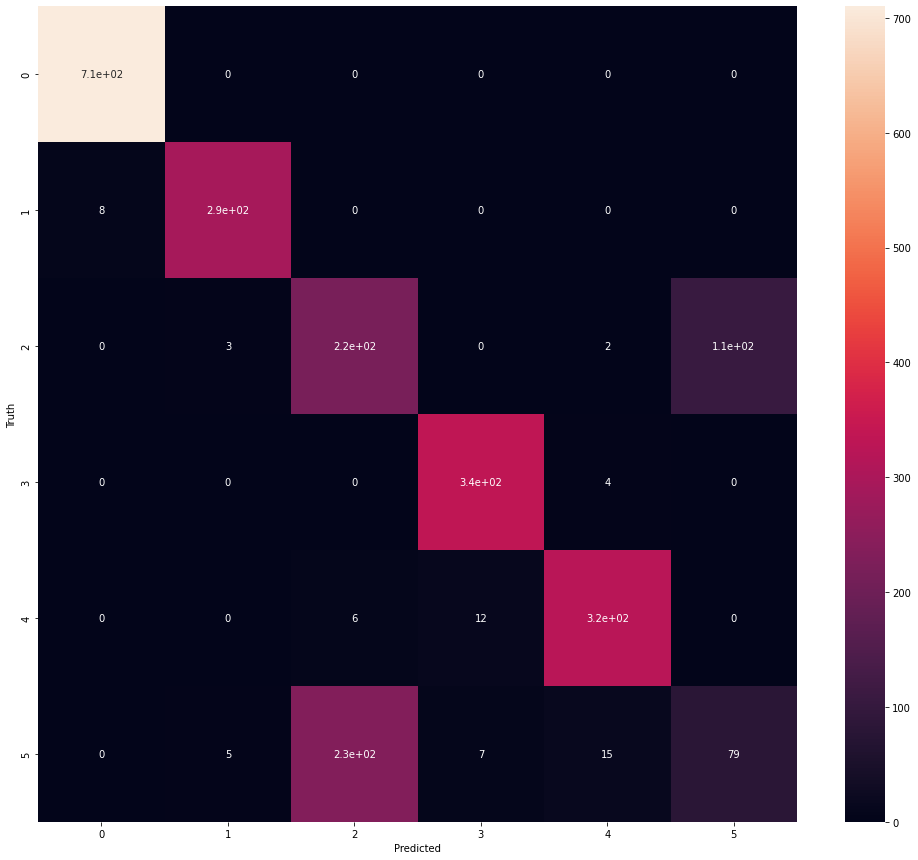

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(17,15))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       710
         110       0.97      0.97      0.97       301
         111       0.47      0.66      0.55       329
        1001       0.95      0.99      0.97       339
        1011       0.94      0.95      0.94       340
        1111       0.42      0.23      0.30       340

    accuracy                           0.83      2359
   macro avg       0.79      0.80      0.79      2359
weighted avg       0.82      0.83      0.82      2359

